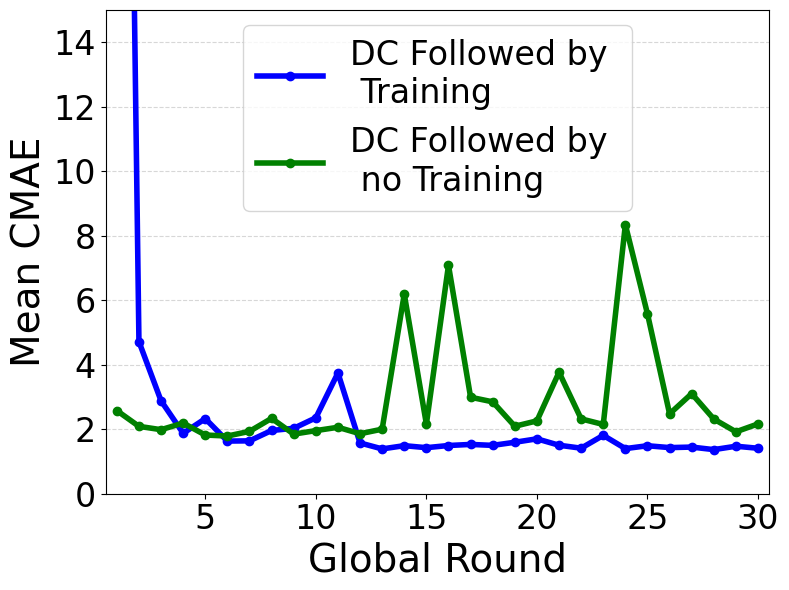

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/RL_comparison_KT_vs_noKT_CMAE.png


In [4]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
p_cwd = p_cwd = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()), "..", ".."))
exp_dirs = [
   p_cwd + "/results/client_level/CFedDC_KT_RL_rl1_C2_timm_mobilevit/exp_no_0_CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_30",
    p_cwd + "/v1_results/client_level/CFedDC_lambda_0.6_kappa_1.0_delta_1.0"
   ]

num_users = 535

# ─── 1. collect CMAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_test", f"user_{uid}_test_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        rc = data.get("resource_category","").replace(" user","").lower()
        if rc != "resourceless":
            continue
        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No CMAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 30)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 6))
cmap   = plt.get_cmap("viridis")
# colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]
colors = ["blue", "green"]
for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    if i == 0: 
        label = f"DC Followed by \n Training"
    else:
        label = f"DC Followed by \n no Training"

    plt.plot( rounds, means, label=label, color=colors[i], linewidth=4, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )
rounds = np.arange(0, common_rounds + 1, 5)
plt.xticks(rounds, rounds, fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 15)
plt.xlabel("Global Round", fontsize=28)
plt.ylabel("Mean CMAE", fontsize=28)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(fontsize=24, loc="lower center", bbox_to_anchor=(0.5, 0.55), ncol=1)
plt.tight_layout()

# out = os.path.join(os.path.dirname(exp_dirs[0]), "all_plots")
out = "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae"
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "RL_comparison_KT_vs_noKT_CMAE.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)


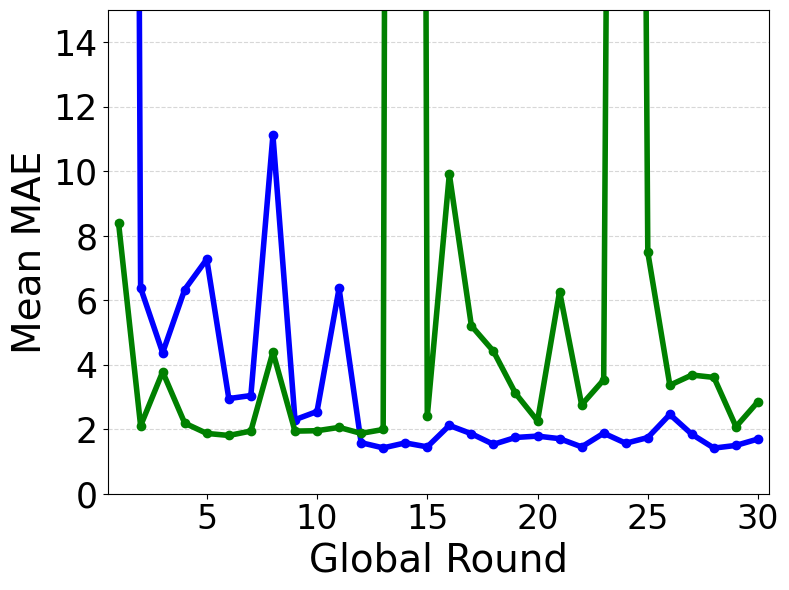

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/RL_comparison_KT_vs_noKT_MAE.png


In [5]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
p_cwd = p_cwd = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()), "..", ".."))
exp_dirs = [
   p_cwd + "/results/client_level/CFedDC_KT_RL_rl1_C2_timm_mobilevit/exp_no_0_CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_30",
    p_cwd + "/v1_results/client_level/CFedDC_lambda_0.6_kappa_1.0_delta_1.0"
   ]

num_users = 535

# ─── 1. collect MAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_test", f"user_{uid}_test_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        rc = data.get("resource_category","").replace(" user","").lower()
        if rc != "resourceless":
            continue
        cmae = data.get("validation_results", {}).get("info_mae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No MAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 30)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 6))
cmap   = plt.get_cmap("viridis")
# colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]
colors = ["blue", "green"]
for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    if i == 0: 
        label = f"DC Followed by Training"
    else:
        label = f"DC Followed by No Training"

    plt.plot( rounds, means, label=label, color=colors[i], linewidth=4, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )
rounds = np.arange(0, common_rounds + 1, 5)
plt.xticks(rounds, rounds, fontsize=24)
plt.yticks(fontsize=25)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 15)
plt.xlabel("Global Round", fontsize=28)
plt.ylabel("Mean MAE", fontsize=28)
plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.legend(fontsize=28,loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=1)
plt.tight_layout()

# out = os.path.join(os.path.dirname(exp_dirs[0]), "all_plots")
out = "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae"
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "RL_comparison_KT_vs_noKT_MAE.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)

Fixed Lambda and No KT for RL
vs.
Variable lambda and KT for RL
vs 
No lambda and KT for RL

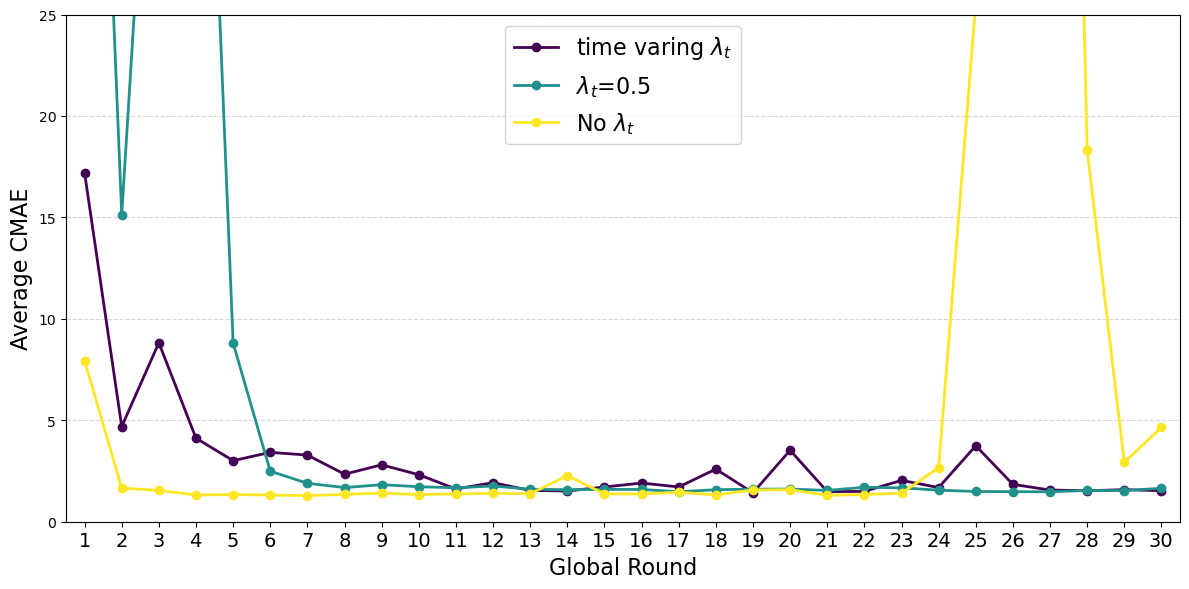

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/RL_comparison_KT_with_lambda_vs_no_lambda.png


In [7]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
exp_dirs = [
   "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0",
   "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0",
   "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0"
   ]

num_users = 535

# ─── 1. collect CMAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_val", f"user_{uid}_val_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        rc = data.get("resource_category","").replace(" user","").lower()
        if rc != "resourceless":
            continue
        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No CMAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 30)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(12,6))
cmap   = plt.get_cmap("viridis")
colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]

for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    if i == 0: 
        label = f"time varing $\lambda_t$"
    elif i==1:
        label = f"$\lambda_t$=0.5"
    else:
        label = f"No $\lambda_t$"

    plt.plot( rounds, means, label=label, color=colors[i], linewidth=2, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )

plt.xticks(rounds, rounds, fontsize=14)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 25)
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(fontsize=16, loc="best")
plt.tight_layout()

out = "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae"
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "RL_comparison_KT_with_lambda_vs_no_lambda.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)

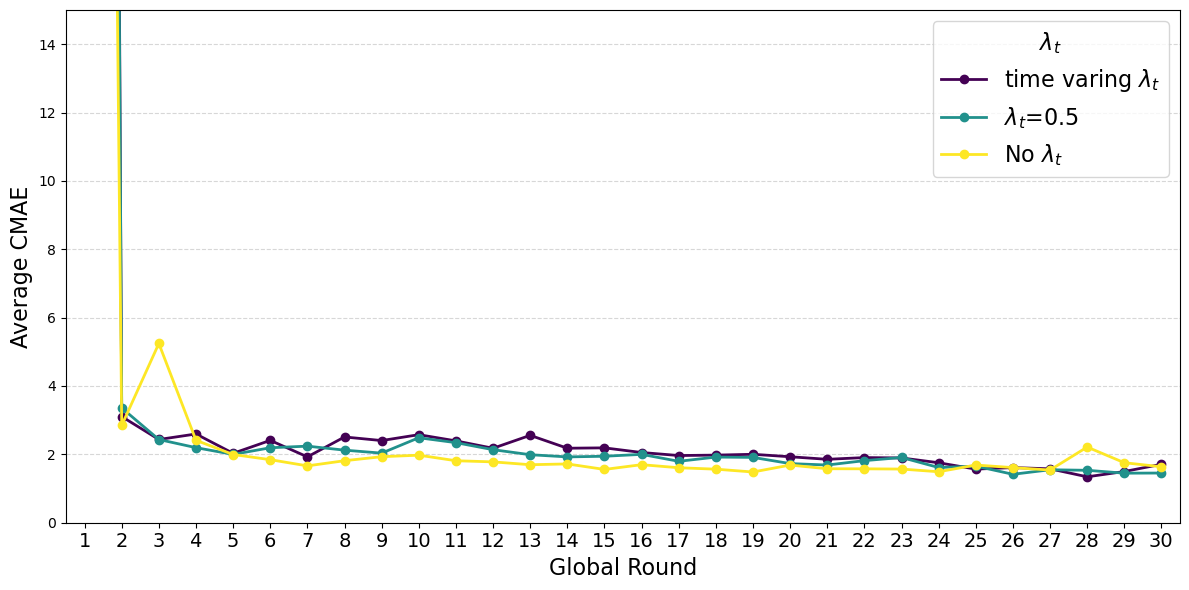

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/RF_comparison_KT_with_lambda_vs_no_lambda.png


In [38]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
exp_dirs = [
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0",
   "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0",
   "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0"
   ]

num_users = 535

# ─── 1. collect CMAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_val", f"user_{uid}_val_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        rc = data.get("resource_category","").replace(" user","").lower()
        if rc != "resourceful":
            continue
        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No CMAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 30)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(12,6))
cmap   = plt.get_cmap("viridis")
colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]

for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    if i == 0: 
        label = f"time varing $\lambda_t$"
    elif i==1:
        label = f"$\lambda_t$=0.5"
    else:
        label = f"No $\lambda_t$"

    plt.plot( rounds, means, label=label, color=colors[i], linewidth=2, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )

plt.xticks(rounds, rounds, fontsize=14)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 15)
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="$\lambda_t$", title_fontsize=16, fontsize=16, loc="best")
plt.tight_layout()

out = os.path.join(os.path.dirname(exp_dirs[0]), "all_mae")
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "RF_comparison_KT_with_lambda_vs_no_lambda.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)

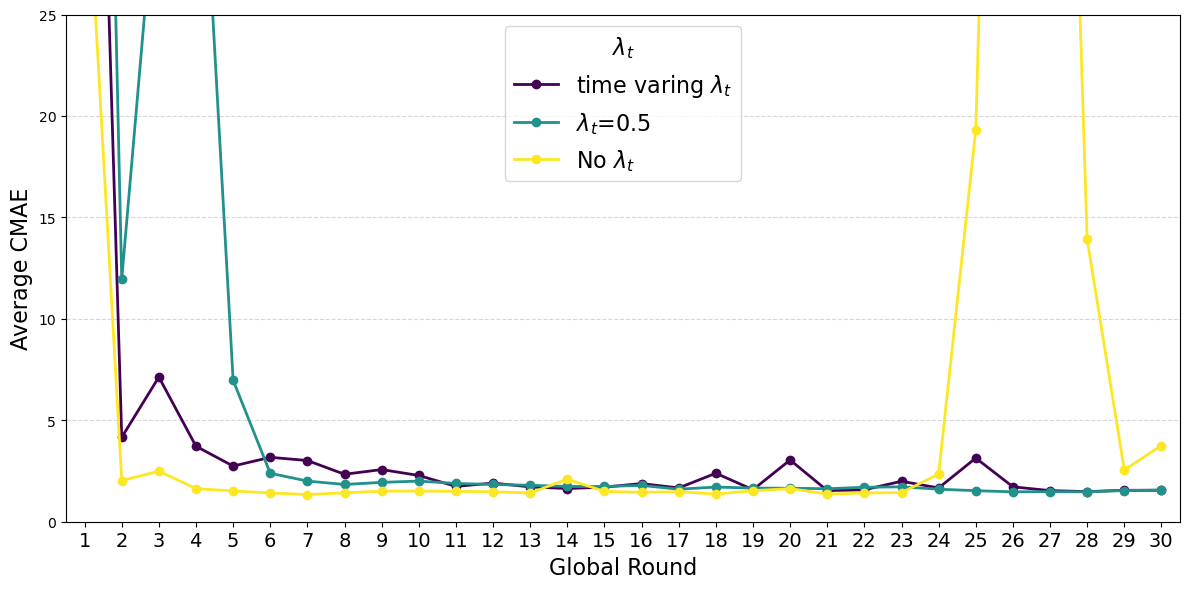

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/all_comparison_KT_with_lambda_vs_no_lambda.png


In [37]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
exp_dirs = [
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0",
   "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0",
   "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0"
   ]

num_users = 535

# ─── 1. collect CMAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_test", f"user_{uid}_test_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        # rc = data.get("resource_category","").replace(" user","").lower()
        # if rc != "resourceful":
        #     continue
        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No CMAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 30)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(12,6))
cmap   = plt.get_cmap("viridis")
colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]

for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    if i == 0: 
        label = f"time varing $\lambda_t$"
    elif i==1:
        label = f"$\lambda_t$=0.5"
    else:
        label = f"No $\lambda_t$"


    plt.plot( rounds, means, label=label, color=colors[i], linewidth=2, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )

plt.xticks(rounds, rounds, fontsize=14)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 25)
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="$\lambda_t$", title_fontsize=16, fontsize=16, loc="best")
plt.tight_layout()

out = os.path.join(os.path.dirname(exp_dirs[0]), "all_mae")
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "all_comparison_KT_with_lambda_vs_no_lambda.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)